In [1]:
import pandas as pd

# Load your dataset
df = pd.read_parquet("../../all_car_details.parquet")

# Show the first 5 rows
df.head()


,url,make,car_title,price,seller,location,num_images,body_type,used_type,drivetrain,...,electric_range,comfort_and_convenience,entertainment_and_media,safety_and_security,extras,exterior_colour,manufacturer_colour,paint,upholstery_colour,upholstery
0,https://www.autoscout24.com/offers/acm-biagini...,acm,ACM Biagini Passo,4555.0,Private seller,"Lokeren , BE",NaN,Convertible,Used,None,...,None,None,None,None,None,Gold,None,None,None,None
1,https://www.autoscout24.com/offers/acm-4-wd-el...,acm,ACM 4 WD,10000001.0,Private seller,"Munich, DE",3.0,Other,Used,None,...,None,None,None,None,None,None,None,Others,None,None
2,https://www.autoscout24.com/offers/acm-biagini...,acm,ACM Biagini Passo,3500.0,Private seller,"Valencia, ES",10.0,Other,Used,None,...,None,None,None,None,None,Blue,None,Others,None,None
3,https://www.autoscout24.com/offers/acm-others-...,acm,ACM,17000.0,Private seller,"Bonndorf , DE",14.0,Station wagon,Antique / Classic,4WD,...,None,Air conditioning;Cruise control;Electrical sid...,None,Central door lock;Power steering,All season tyres,Brown,None,None,Brown,Full leather
4,https://www.autoscout24.com/offers/ariel-motor...,ariel-motor,Ariel Motor Atom,100000.0,Private seller,"ancona, IT",16.0,Other,Used,None,...,None,Air suspension;Keyless central door lock;Leath...,None,Alarm system;Fog lights;Immobilizer,All season tyres,Black,None,Metallic,Black,None


In [3]:
# Select only relevant columns for luxury clustering
features = [
    'make',
    'upholstery',
    'paint',
    'manufacturer_colour',
    'power',
    'engine_size',
    'gearbox',
    'cylinders'
]

df_cluster = df[features].copy()

# Show result
df_cluster.head()


,make,upholstery,paint,manufacturer_colour,power,engine_size,gearbox,cylinders
0,acm,None,None,None,71.0,NaN,None,None
1,acm,None,Others,None,167.0,NaN,None,None
2,acm,None,Others,None,111.0,NaN,None,None
3,acm,Full leather,None,None,116.0,4200.0,Automatic,6
4,ariel-motor,None,Metallic,None,245.0,NaN,None,None


In [4]:
# Remove rows where power or engine_size or cylinders are missing
df_cluster_clean = df_cluster.dropna(subset=['power', 'engine_size', 'cylinders'])

# Reset index
df_cluster_clean.reset_index(drop=True, inplace=True)

# Show result
df_cluster_clean.head()


,make,upholstery,paint,manufacturer_colour,power,engine_size,gearbox,cylinders
0,acm,Full leather,None,None,116.0,4200.0,Automatic,6
1,ariel-motor,Other,None,None,349.0,1998.0,Manual,4
2,skoda,Cloth,Metallic,Deep-schwarz perleffekt,60.0,999.0,Automatic,3
3,skoda,None,Others,Candy-Weiss,75.0,999.0,Manual,3
4,skoda,None,None,Zwart,75.0,1199.0,Manual,3


In [ ]:

# Old code used (too many columns)
# categorical_cols = ['make', 'upholstery', 'paint', 'manufacturer_colour', 'gearbox']
#df_cluster_encoded = pd.get_dummies(df_cluster_clean, columns=categorical_cols)

# One-hot encode categorical features
df_cluster_small = df_cluster_clean[['make', 'power', 'engine_size', 'cylinders']].copy()

# One-hot encode only 'make' (brand)
df_cluster_encoded = pd.get_dummies(df_cluster_small, columns=['make'])

# Show result
df_cluster_encoded.head()


,power,engine_size,cylinders,make_9ff,make_abarth,make_ac,make_acm,make_acura,make_aiways,make_aixam,...,make_vem,make_volkswagen,make_volvo,make_wartburg,make_westfield,make_wey,make_wiesmann,make_xev,make_zastava,make_zaz
0,116.0,4200.0,6,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,349.0,1998.0,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,60.0,999.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,75.0,999.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,75.0,1199.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the data
df_scaled = scaler.fit_transform(df_cluster_encoded)

# Show the scaled array shape
print("Scaled data shape:", df_scaled.shape)


Scaled data shape: (354683, 194)


In [9]:
from sklearn.cluster import KMeans

# Set number of clusters
n_clusters = 4

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(df_scaled)

# Assign cluster labels
df_cluster_clean['cluster'] = kmeans.labels_

# Show first 5 rows with cluster assignment
df_cluster_clean.head()


C:\Users\faisa\AppData\Local\Temp\ipykernel_21584\1694421220.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_clean['cluster'] = kmeans.labels_


,make,upholstery,paint,manufacturer_colour,power,engine_size,gearbox,cylinders,cluster
0,acm,Full leather,None,None,116.0,4200.0,Automatic,6,0
1,ariel-motor,Other,None,None,349.0,1998.0,Manual,4,0
2,skoda,Cloth,Metallic,Deep-schwarz perleffekt,60.0,999.0,Automatic,3,2
3,skoda,None,Others,Candy-Weiss,75.0,999.0,Manual,3,2
4,skoda,None,None,Zwart,75.0,1199.0,Manual,3,2


In [13]:
# Count how many cars are in each cluster
cluster_counts = df_cluster_clean['cluster'].value_counts().sort_index()
print("Cars per cluster:")
print(cluster_counts)



Cars per cluster:
cluster
0     61543
1     11710
2    280703
3       727
Name: count, dtype: int64


In [14]:
# Fix cylinders column: convert to numeric (force errors to NaN, then drop rows with NaN)
df_cluster_clean['cylinders'] = pd.to_numeric(df_cluster_clean['cylinders'], errors='coerce')
df_cluster_clean = df_cluster_clean.dropna(subset=['cylinders'])
df_cluster_clean['cylinders'] = df_cluster_clean['cylinders'].astype(int)

# Check types again
print(df_cluster_clean.dtypes[['power', 'engine_size', 'cylinders']])


power          float64
engine_size    float64
cylinders        int64
dtype: object


C:\Users\faisa\AppData\Local\Temp\ipykernel_21584\3607572762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_clean['cylinders'] = pd.to_numeric(df_cluster_clean['cylinders'], errors='coerce')


In [15]:
# Calculate average values of numeric features per cluster
cluster_summary = df_cluster_clean.groupby('cluster')[['power', 'engine_size', 'cylinders']].mean()
print("Cluster feature averages:")
print(cluster_summary)


Cluster feature averages:
              power  engine_size  cylinders
cluster                                    
0        397.367613  3784.353054   6.953788
1        125.463365  1532.832451   3.748420
2        150.047085  1683.060381   3.880678
3         82.786795  1243.008253   3.642366


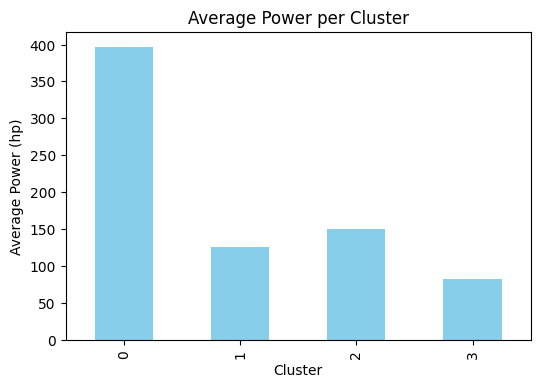

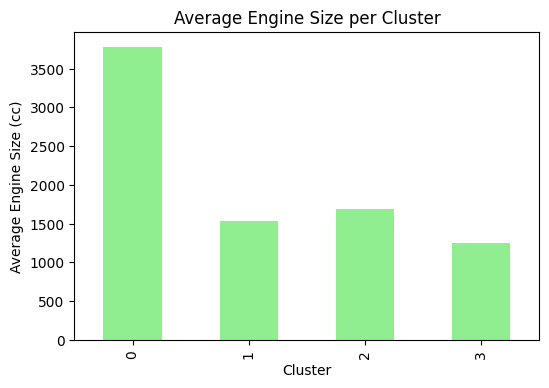

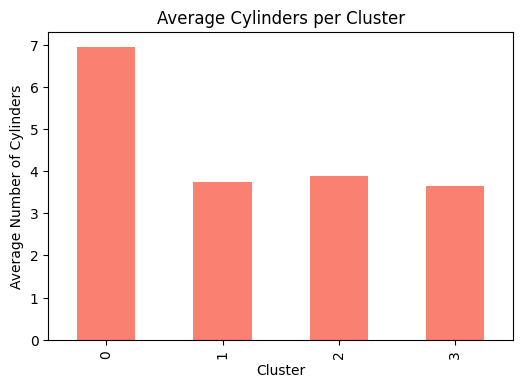

In [16]:
import matplotlib.pyplot as plt

# Plot average power
plt.figure(figsize=(6,4))
cluster_summary['power'].plot(kind='bar', color='skyblue')
plt.title('Average Power per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Power (hp)')
plt.show()

# Plot average engine size
plt.figure(figsize=(6,4))
cluster_summary['engine_size'].plot(kind='bar', color='lightgreen')
plt.title('Average Engine Size per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Engine Size (cc)')
plt.show()

# Plot average cylinders
plt.figure(figsize=(6,4))
cluster_summary['cylinders'].plot(kind='bar', color='salmon')
plt.title('Average Cylinders per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Number of Cylinders')
plt.show()


## Cluster Interpretation

After clustering cars based on brand, power, engine size, and cylinders, we interpret the 4 clusters as follows:

- **Cluster 0:** Super-luxury / sports cars (high power, large engines, many cylinders)
- **Cluster 1:** Small economy cars (low power, small engines)
- **Cluster 2:** Mid-range normal cars (average power and size)
- **Cluster 3:** Compact city cars or entry models (smallest engines and fewest cylinders)

This gives valuable insights into the luxury segmentation of the dataset.


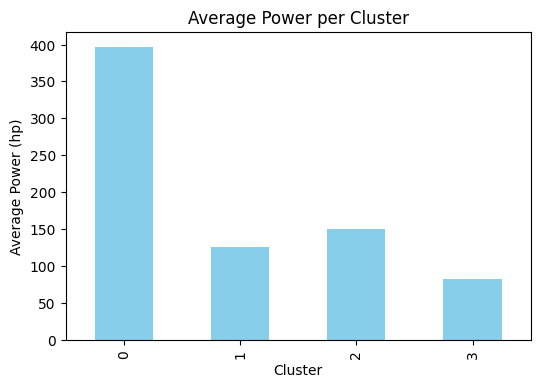

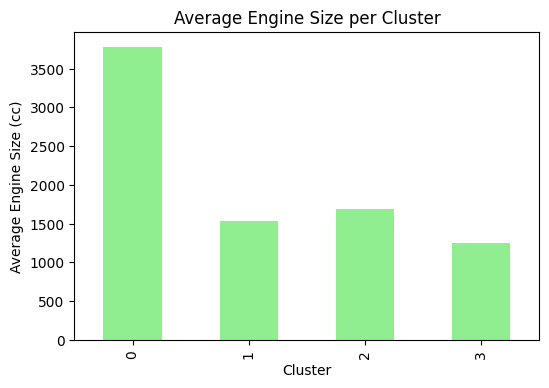

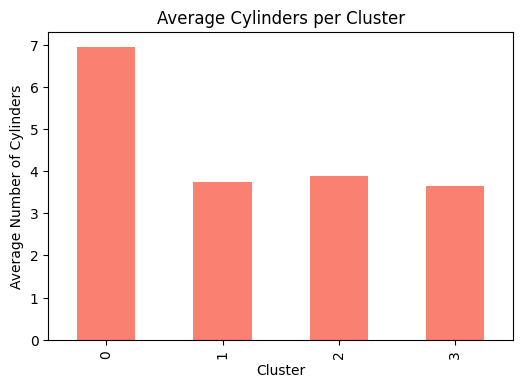

In [19]:
#  Save power plot
plt.figure(figsize=(6,4))
cluster_summary['power'].plot(kind='bar', color='skyblue')
plt.title('Average Power per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Power (hp)')
plt.savefig('average_power_per_cluster.png', dpi=300)  # ✅ saves image
plt.show()

# Plot average engine size
plt.figure(figsize=(6,4))
cluster_summary['engine_size'].plot(kind='bar', color='lightgreen')
plt.title('Average Engine Size per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Engine Size (cc)')
plt.savefig('average_engine_size_per_cluster.png', dpi=300)  # ✅ saves image
plt.show()

# Plot average cylinders
plt.figure(figsize=(6,4))
cluster_summary['cylinders'].plot(kind='bar', color='salmon')
plt.title('Average Cylinders per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Number of Cylinders')
plt.savefig('average_cylinders_per_cluster.png', dpi=300)  # ✅ saves image
plt.show()



In [21]:
# Show top brands for each cluster
for c in sorted(df_cluster_clean['cluster'].unique()):
    brands = df_cluster_clean[df_cluster_clean['cluster'] == c]['make'].value_counts().head(5)
    print(f"\nTop brands in Cluster {c}:")
    print(brands)



Top brands in Cluster 0:
make
porsche          13606
audi              9959
mercedes-benz     9220
land-rover        5733
ferrari           2981
Name: count, dtype: int64

Top brands in Cluster 1:
make
peugeot    11710
Name: count, dtype: int64

Top brands in Cluster 2:
make
volkswagen       18695
ford             17952
toyota           14480
renault          14157
mercedes-benz    13810
Name: count, dtype: int64

Top brands in Cluster 3:
make
daihatsu    727
Name: count, dtype: int64


## Cluster Analysis Findings

The clustering analysis revealed clear segmentation of cars based on luxury and performance features:

- **Cluster 0:** High-end luxury and sports cars, dominated by brands like **Porsche**, **Ferrari**, **Mercedes-Benz**, **Audi**, and **Land Rover**.
- **Cluster 1:** Small city cars, mainly consisting of **Peugeot** models.
- **Cluster 2:** Mid-range mass-market vehicles including **Volkswagen**, **Ford**, **Toyota**, **Renault**, and **Mercedes-Benz** entry models.
- **Cluster 3:** Compact budget cars, with **Daihatsu** being the most common brand.

These results confirm that clustering based on **power, engine size, cylinders**, and **brand** effectively separates vehicles into meaningful market segments.
